Epoch 1/10
131/131 [==============================] - 563s 4s/step - loss: 0.0966 - accuracy: 0.9700 - val_loss: 0.0135 - val_accuracy: 0.9955
Epoch 2/10
131/131 [==============================] - 501s 4s/step - loss: 0.0093 - accuracy: 0.9976 - val_loss: 0.0061 - val_accuracy: 0.9972
Epoch 3/10
131/131 [==============================] - 522s 4s/step - loss: 0.0067 - accuracy: 0.9978 - val_loss: 0.0166 - val_accuracy: 0.9983
Epoch 4/10
131/131 [==============================] - 532s 4s/step - loss: 0.0060 - accuracy: 0.9978 - val_loss: 0.0052 - val_accuracy: 0.9983
Epoch 5/10
131/131 [==============================] - 503s 4s/step - loss: 4.1095e-05 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 0.9978
Epoch 6/10
131/131 [==============================] - 500s 4s/step - loss: 4.3870e-05 - accuracy: 1.0000 - val_loss: 0.0063 - val_accuracy: 0.9978
Epoch 7/10
131/131 [==============================] - 500s 4s/step - loss: 1.8065e-05 - accuracy: 1.0000 - val_loss: 0.0071 - val_accu

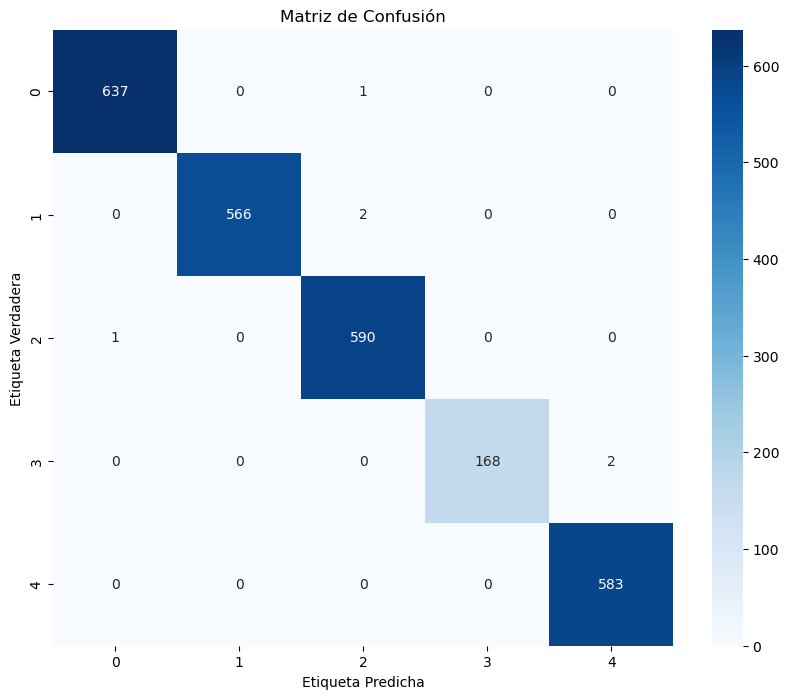

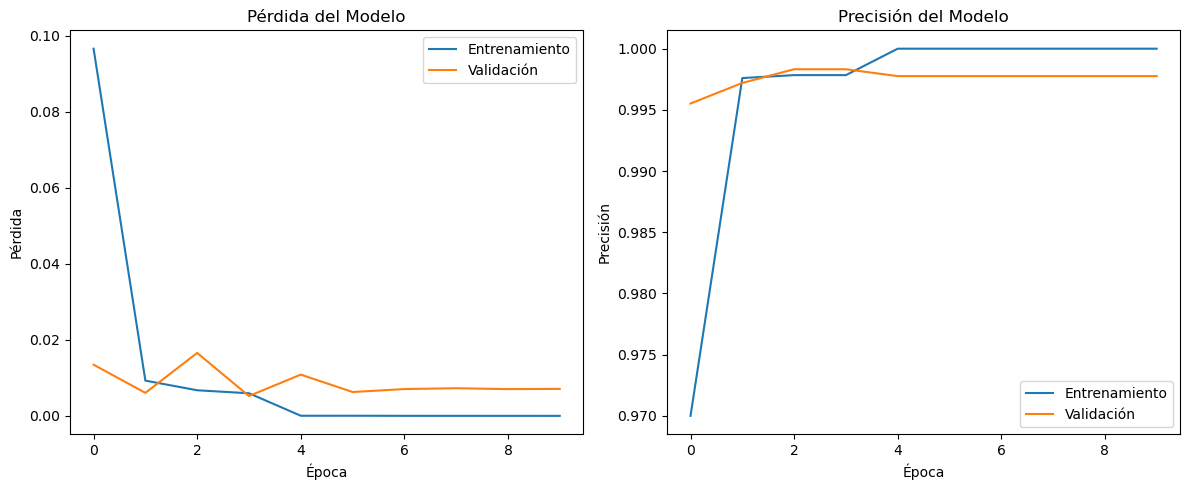

In [6]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Embedding
from keras_preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Función mejorada para codificar secuencias
def encode_sequence(seq, k=1):
    encoding = {
        'A': 0, 'C': 1, 'G': 2, 'T': 3, 'U': 3,
        'R': 4, 'Y': 5, 'S': 6, 'W': 7, 'K': 8, 'M': 9,
        'B': 10, 'D': 11, 'H': 12, 'V': 13, 'N': 14,
        '-': 15, '.': 15
    }
    encoded = [encoding.get(nuc.upper(), 14) for nuc in seq]
    return encoded if k == 1 else [encoded[i:i+k] for i in range(0, len(encoded), k)]

# Cargar y preparar los datos
data = pd.read_csv('secuencias_etiquetadas_2.csv')
sequences = data['sequence'].values
labels = data['label'].values

le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

# Codificar secuencias
encoded_sequences = [encode_sequence(seq) for seq in sequences]
max_length = max(len(seq) for seq in encoded_sequences)
padded_sequences = pad_sequences(encoded_sequences, maxlen=max_length, padding='post', value=14)


# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels_encoded, test_size=0.3, random_state=42)

# Definir y compilar el modelo 

model=Sequential()
model.add(Embedding(input_dim=16, output_dim=8, input_length=max_length))  # Adjust input_dim based on your encoding
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(np.unique(labels_encoded)), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.3, verbose=1)

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Visualizaciones
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.show()

# Gráficos de pérdida y precisión
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()